<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/WeightInitilizationTechnique(WhatNotToDo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Why Weight Initilization is important?**

If we dont initilize weight perfectly, we may encounter -

1)Vanishing Gradient roblem.

2)Exploding Gradient Problem

3)Slow convergence,which means it will take more time to reach at our best values of weight.

**What we should not do while initializing the weights-**

**Case 1- Dont set initial weight value as 0**

Consider a regression problem in deep learning with relu activation function.we find output of the neuron as z = w1x1 + w2x2 + b

So if we set initial weight and bias value as 0 then our z value will also become 0.Output of the activation function will also become 0. We want to use backpropogation algorithm and want to update the weight values.At some time for updating the weight values , we will have find out the derivative of activation function, but we have output of activation function as 0 so total value of updation for w11 will become w11 only.So there will be case of no updation in weight values.

So if we consider relu activation function and we set all weight and bias values as 0 then training will take place and forever the weight values will be stucked in 0. Thats why we shouldnt initilize the weight and bias values as 0

If we use tanh activation function in regression problem and initialize the weight and bias values as 0 ,  we will encounter the same problem as relu activation function of non-updation of weight values.

**Now we will try to initilize weight and bias as 0  with sigmid as well as relu activation function in following regression preoblem-**

In [ ]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

Link Of Dataset is: https://www.kaggle.com/datasets/kartikparatkar/ushape

In [ ]:
df = pd.read_csv('/content/ushape.csv')

In [ ]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [ ]:
df.shape

(99, 3)

In [ ]:
df.rename(columns={"3.159499363321345566e-02":"x","9.869877579082642072e-01":"y","0.000000000000000000e+00":"class"},inplace = True)

In [ ]:
df.to_csv('/content/ushape.csv',index = False)

In [ ]:
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


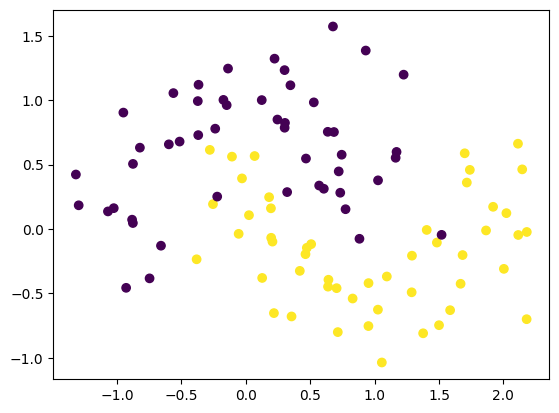

In [ ]:
#Plotting the dataset
plt.scatter(df['x'],df['y'],c=df['class'])

In [ ]:
x = df.iloc[:,0:2].values #Storing first 2 columns in x
y = df.iloc[:,-1].values   #Storing last column in y

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
#Now building the model
model = Sequential()
model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fetching the default weights that keras set while training the neural network
model.get_weights()

[array([[ 0.17997575, -0.37150937],
        [-1.2218295 , -0.6161974 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.705226 ],
        [ 1.0150748]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights() #Storing the defalut weight values in initial_weights value

In [ ]:
#We are setting all the default weight and biases as 0
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights() #Here observe that weight and bias values of model is 0

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
#NOw we will compile and train the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history= model.fit(x,y,epochs =100,validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.5242 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4466 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4198 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4875 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5227 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()
#We have trained the model and now printing the weight and bias values.
#Here all the weight and bias values are 0 only whch means it is not getting
#updated when we set the initial weight and bias value as 0

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.01850973], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


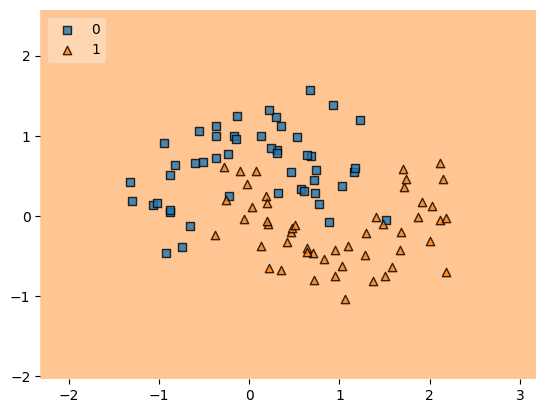

In [ ]:
#Now we will draw the decision boundry
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.show()

Model is not giving any kind of decision boundry and model is performing very bad.
If we use tanh activation function also,we will not get any kind of updated weight values when we initialize input weights and bias as 0.

Now we will use sigmoid activation function in hideen layers and initialize the weights and biases with value with 0 and see what is the result.If we do this then our model will work as a linear model and it wont be able to capture the non-linear patterns present in the data. Lets try to build model to verfy this:


In [ ]:
model2 = Sequential()
model2.add(Dense(10,activation = 'sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#set parameters to 0
model2.get_weights()
#These are the default weights initialized by keras

[array([[-0.0090363 , -0.01644653,  0.4620152 ,  0.28994823, -0.27347976,
          0.27219683, -0.10432106,  0.57250065,  0.1374166 ,  0.3031196 ],
        [-0.11690712, -0.6207167 ,  0.6792024 ,  0.17969745, -0.69231355,
          0.06116033, -0.1720699 ,  0.4377454 , -0.6471709 ,  0.04127508]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.632796  ],
        [ 0.02991837],
        [ 0.07027733],
        [ 0.18764842],
        [-0.10794836],
        [-0.52647644],
        [-0.03238904],
        [-0.36451104],
        [-0.2892537 ],
        [-0.12112683]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model2.get_weights()

In [ ]:
#We are setting all the default weight and biases as 0
initial_weights[0] = np.zeros(model2.get_weights()[0].shape)
initial_weights[1] = np.zeros(model2.get_weights()[1].shape)
initial_weights[2] = np.zeros(model2.get_weights()[2].shape)
initial_weights[3] = np.zeros(model2.get_weights()[3].shape)

In [ ]:
model2.set_weights(initial_weights)

In [ ]:
model2.get_weights() #Here we have set initial weights and bias as 0

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
#NOw we will compile and train the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history= model2.fit(x,y,epochs =100,validation_split=0.2)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.4749 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4758 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5344 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5305 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5188 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss

In [ ]:
model2.get_weights()

[array([[ 0.42977366,  0.42977366,  0.42977366,  0.42977366,  0.42977363,
          0.42977363,  0.42977363,  0.42977363,  0.42977363,  0.42977363],
        [-0.4690621 , -0.4690621 , -0.4690621 , -0.4690621 , -0.4690621 ,
         -0.4690621 , -0.4690621 , -0.4690621 , -0.4690621 , -0.4690621 ]],
       dtype=float32),
 array([-0.12434983, -0.12434983, -0.12434983, -0.12434983, -0.12434982,
        -0.12434982, -0.12434982, -0.12434982, -0.12434982, -0.12434982],
       dtype=float32),
 array([[0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608],
        [0.06263608]], dtype=float32),
 array([-0.05853563], dtype=float32)]

Here notice that the weights coming from first layer are all same i.e.0.4297366
The same value of weights means that though you have defined 10 nodes in the hidden layer but it is working as a single node only and it acts as a linear model.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


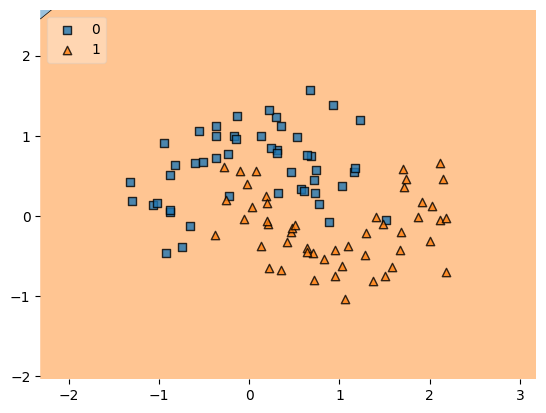

In [ ]:
#Now we will draw the decision boundry
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.show()
#Here notice that we got a linear model of decision boundry and it is working as perceptron model.

So till now we have concluded that we should not initialize the weight and bias value with 0 because it will not be able to capture the complex patterns in your dataset and with different activation functions , the model will behave diffeently.

**Case 2--> Initializing weight and bias values with non-zero constant value.**

Let consider if we initilize the weight and bias values as 0.5 then the derivative of weights coming from a perticular input will be same.That means the updation in values of weights coming from a perticular input will be same , which means even if there are 3 things coming from a perticular input it will act as a single neuron.

So in short, we shuldnt initialize the weight value by 0 and not by any non-zero constant value.So we have only one option to initialize the values of weight and bias randomly.

**Case 3-Random Initialization of weight and biass**

If we are not getting desired results by initializing weights and bias values by 0 or any other non-zero constant value then we are spare with only one option of initializing the weight and bias values randomly. We have 2 cases in initializing input weight and bias values as follows:

**1)Initializing weight and bias values by small random values.**

Small random value means in the range like 0.0007,0.0004,0.0005 etc. IN case of tanh activation function, we will get very high vanishing gradient problem . In case of sigmoid activation function we will get somewhat low vanishing gradient problem as compaed to tanh. And in case of relu activaton function,the training of the model will be very slow and convergence of the model towards correct values of weight and biases will also be slow.



Lets try to create a neural network model having different activation function with weight initilized values as very small in range of 0.0007,0.0005 etc as follows:

In [ ]:
model3 = Sequential()
model3.add(Dense(2,activation = 'tanh',input_dim=2))
model3.add(Dense(2,activation = 'tanh'))
model3.add(Dense(2,activation = 'tanh'))
model3.add(Dense(2,activation = 'tanh'))
model3.add(Dense(1,activation = 'sigmoid'))
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.get_weights()
#These are the initialized weight values set by keras library

[array([[ 1.0859905 , -0.82215863],
        [-0.77074325,  0.21079004]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.7081406 , -0.4536872 ],
        [-0.8513857 ,  0.32451224]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.91991127, -1.0767163 ],
        [ 0.78473485, -0.17178297]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.707724  , 0.7441348 ],
        [1.0159875 , 0.28138685]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.52954984],
        [1.1327673 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights=model3.get_weights()

In [ ]:
initial_weights[0] = np.random.randn(model3.get_weights()[0].shape[0], model3.get_weights()[0].shape[1]) * 0.01
initial_weights[1] = np.zeros(model3.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model3.get_weights()[2].shape[0], model3.get_weights()[2].shape[1]) * 0.01
initial_weights[3] = np.zeros(model3.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model3.get_weights()[4].shape[0], model3.get_weights()[4].shape[1]) * 0.01
initial_weights[5] = np.zeros(model3.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model3.get_weights()[6].shape[0], model3.get_weights()[6].shape[1]) * 0.01
initial_weights[7] = np.zeros(model3.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model3.get_weights()[8].shape[0], model3.get_weights()[8].shape[1]) * 0.01
initial_weights[9] = np.zeros(model3.get_weights()[9].shape)

In [ ]:
model3.set_weights(initial_weights)

In [ ]:
model3.get_weights()
#Here observe that all the weight values are very small and all the biases are zero

[array([[-0.00724875, -0.01174159],
        [ 0.00313777,  0.00306068]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-8.8844199e-06, -1.7479358e-02],
        [ 6.2288637e-03, -8.4029725e-03]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.0076037 ,  0.00478388],
        [ 0.00551717, -0.0088892 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01785579, -0.00639139],
        [ 0.01599389,  0.0041983 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01613474],
        [-0.00924322]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5046 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4388 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5007 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5086 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4622 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [ ]:
model3.get_weights()

[array([[-3.9359638e-03, -1.1220918e-02],
        [-1.5031890e-05,  2.5579806e-03]], dtype=float32),
 array([1.2229490e-05, 2.4379724e-06], dtype=float32),
 array([[ 0.00080336, -0.01600979],
        [ 0.00801137, -0.00560907]], dtype=float32),
 array([-0.00041202, -0.00062435], dtype=float32),
 array([[ 0.00978664,  0.00295467],
        [ 0.00037353, -0.0044948 ]], dtype=float32),
 array([-0.00384871,  0.00332853], dtype=float32),
 array([[-0.01185667, -0.01065948],
        [ 0.00934493,  0.00862398]], dtype=float32),
 array([ 5.984556e-03, -7.377501e-05], dtype=float32),
 array([[ 9.8274834e-03],
        [-2.9688192e-05]], dtype=float32),
 array([0.01133009], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


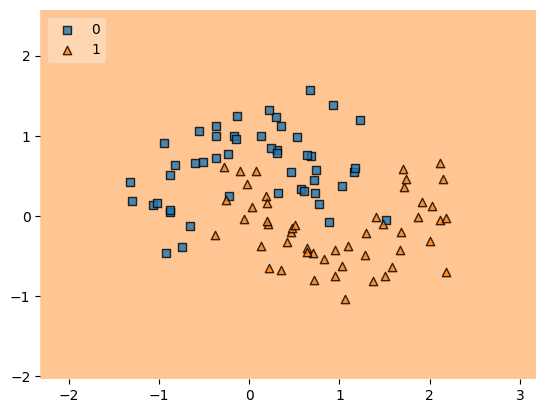

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'),clf=model3,legend=2)
plt.show()

Here observe that model is predicting that all are 1 and it is giving 50% accuracy which is very bad. We can experiment with this model3 by changing the activation function to sigmoid and relu and observe the behaviour of model on this data.

**2)Initializing weight and bias values by large random values.**

Initializing the weight and bias values by large numbers means in the range of 0 and 1.If we do this along with tanh or sigmoid activation function then there will be saturation in the model.For  each neuron , sum of wixi will be very large like till range of 100.Because of this saturation in the model,we will have very slow training of model and worst case scenario , there will be vanishing gradient problem arising.

 In summery of this whole workbook, we can not-

1)Zero initialization of weights

2) Non-zero constant initialization

3)Random initialization with small weights

4)Random initialization with large weights